# Import Library

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB  
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from IPython.display import display
from sklearn.utils import resample

# Reading DataSet


In [2]:
df=pd.read_csv('machine_failure.csv')

# Take a Simple

In [3]:
df.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,NaN,Drill,1
3,85.230299,NaN,NaN,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,NaN,Drill,1


# Show some Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     800 non-null    float64
 2   Power_Usage   800 non-null    float64
 3   Humidity      800 non-null    float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


#  Missing_Values Before Handling 

In [5]:
df.isnull().sum()  

Temperature       0
Vibration       200
Power_Usage     200
Humidity        200
Machine_Type      0
Failure_Risk      0
dtype: int64

In [6]:
missing_values = df.isnull().sum() 

C:\Users\MANDO\AppData\Local\Temp\ipykernel_8792\1848909344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


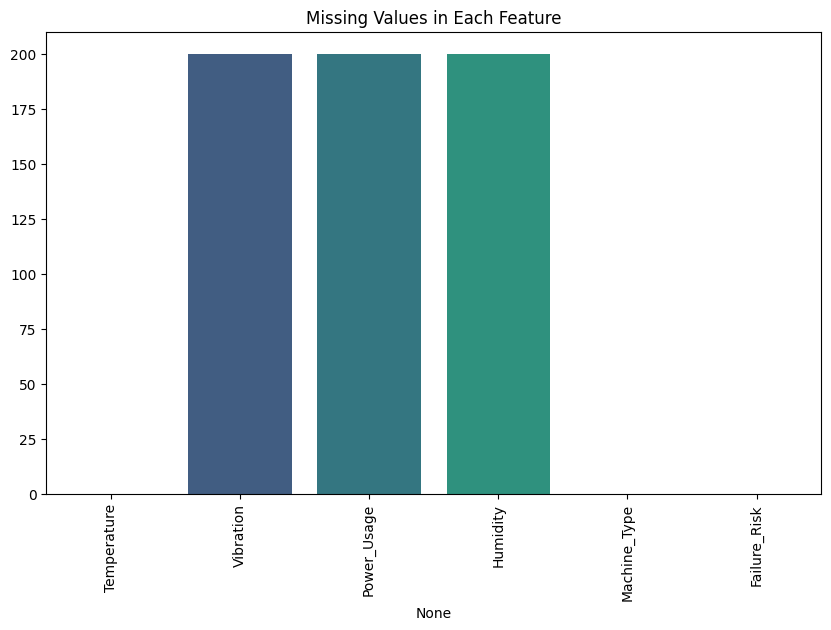

In [7]:
plt.figure(figsize=(10, 6))

sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

plt.xticks(rotation=90)

plt.title("Missing Values in Each Feature")

plt.show()

#  Handling Missing_Values   

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

imputer_categorical = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = imputer_categorical.fit_transform(df[non_numeric_cols])

df.isnull().sum()

Temperature     0
Vibration       0
Power_Usage     0
Humidity        0
Machine_Type    0
Failure_Risk    0
dtype: int64

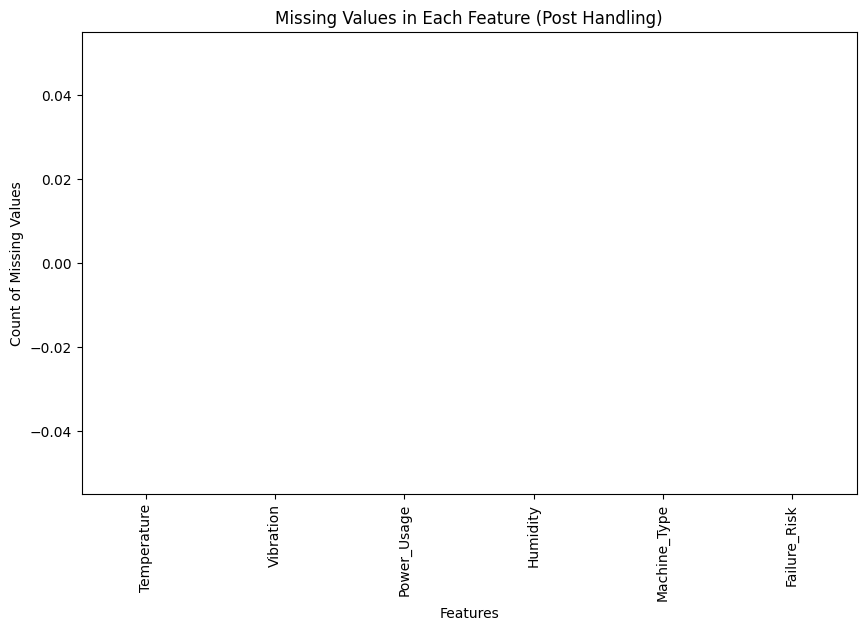

In [9]:
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Each Feature (Post Handling)")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.show()

# Data after handling missing values

In [10]:
pd.DataFrame(data=df, columns=df.columns)

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1.0
1,68.617357,54.623168,9.710963,25.698075,Lathe,0.0
2,76.476885,50.298152,8.415160,29.916286,Drill,1.0
3,85.230299,50.313666,10.038423,39.438438,Lathe,1.0
4,67.658466,53.491117,6.212771,29.916286,Drill,1.0
...,...,...,...,...,...,...
995,67.188997,55.350751,10.154961,30.142288,Lathe,1.0
996,87.976865,49.867394,10.515505,19.610941,Drill,0.0
997,76.408429,45.590627,7.516479,29.916286,Mill,0.0
998,64.288210,49.184665,10.668353,38.216891,Mill,1.0


# Lebel_Encoding

In [11]:
label_encoder = LabelEncoder()
df['Machine_Type'] = label_encoder.fit_transform(df['Machine_Type'])
df.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,2,1.0
1,68.617357,54.623168,9.710963,25.698075,1,0.0
2,76.476885,50.298152,8.415160,29.916286,0,1.0
3,85.230299,50.313666,10.038423,39.438438,1,1.0
4,67.658466,53.491117,6.212771,29.916286,0,1.0


# Splitting the dataset to X (Feature) and Y (Target)

In [12]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Splitting the dataset to train and test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Class 0: 700
Class 1: 300
Proportion: 2.3 : 1


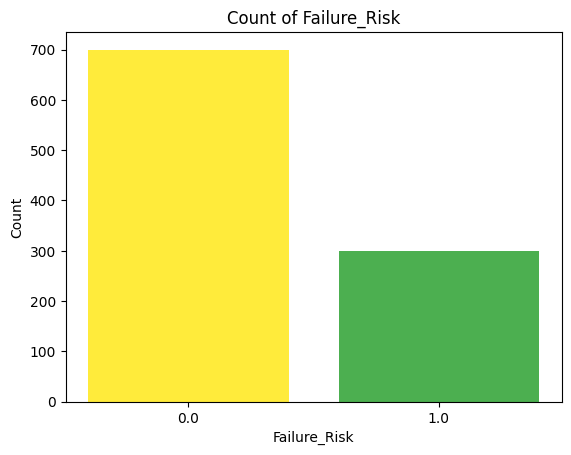

In [14]:
target_column = df.columns[-1]
class_counts = df[target_column].value_counts()
if 0 in class_counts.index and 1 in class_counts.index:
    proportion = class_counts[0] / class_counts[1]
else:
    proportion = "N/A"
print(f"Class 0: {class_counts.get(0, 0)}")
print(f"Class 1: {class_counts.get(1, 0)}")
print(f"Proportion: {proportion:.1f} : 1" if proportion != "N/A" else "Proportion: N/A")
colors = ['#FFEB3B', '#4CAF50']  
plt.bar(class_counts.index.astype(str), class_counts.values, color=colors)
plt.title(f"Count of {target_column}")
plt.xlabel(target_column)
plt.ylabel("Count")
plt.show()

# The Embalane for Data

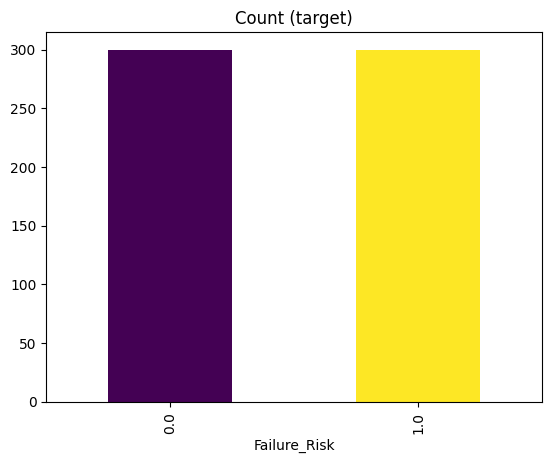

In [15]:
y = df.iloc[:, -1]  
count_class_yes = (y == 1).sum()
count_class_no = (y == 0).sum()
if count_class_yes == 0 or count_class_no == 0:
    raise ValueError("One of the classes has no samples. Please check your dataset.")
df_class_yes = df[y == 1]
df_class_no = df[y == 0]
if count_class_no > 0:
    df_class_no_upsampled = resample(df_class_no,
                                    replace=True, 
                                    n_samples=count_class_yes, 
                                    random_state=42)
    df_upsampled = pd.concat([df_class_no_upsampled, df_class_yes])
    class_counts = df_upsampled.iloc[:, -1].value_counts()
    colors = plt.cm.viridis(np.linspace(0, 1, len(class_counts)))
    class_counts.plot(kind='bar', color=colors, title='Count (target)')
    plt.show()

# Feature Scaling

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Dimensionality reduction

In [17]:
pca = PCA()
pca = PCA(n_components=2)  
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Train Data after Feature scaling and Dimensionality reduction

In [18]:
pd.DataFrame( data = x_train, columns=["PCA1", "PCA2"])

,PCA1,PCA2
0,0.151800,-1.068766
1,1.761677,-1.114239
2,0.312558,0.959815
3,0.904368,0.691969
4,3.312396,0.467425
...,...,...
795,0.188273,-0.228260
796,0.374202,0.712169
797,0.439258,0.762464
798,-0.145424,0.015625


In [19]:
y_train = (y_train > 0.5).astype(int)  
y_test = (y_test > 0.5).astype(int)    

## Initiating the KNN Classifier

In [20]:
classifier = KNeighborsClassifier(n_neighbors=9)

In [21]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
y_train_pred = classifier.predict(x_train)

In [23]:

y_test_pred = classifier.predict(x_test)

In [24]:
cm = confusion_matrix(y_test, y_test_pred)
accuracyScore = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy: {accuracyScore * 100:.2f}%")
print("Confusion Matrix:\n", cm)

Model Accuracy: 65.50%
Confusion Matrix:
 [[124  11]
 [ 58   7]]


### Confusion Matrix

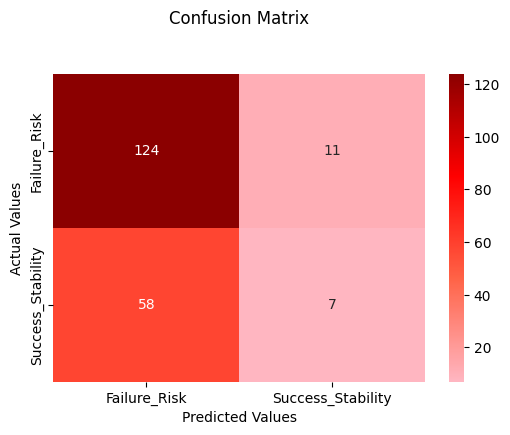

In [25]:
cmap = mcolors.LinearSegmentedColormap.from_list("red_gradient", ["#FFB6C1", "#FF6347", "#FF0000", "#8B0000"])

plt.figure(figsize=(6, 4))
ax = sb.heatmap(cm, annot=True, cmap=cmap, fmt="d", cbar=True)

ax.set_title('Confusion Matrix\n\n')

ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['Failure_Risk', 'Success_Stability'])
ax.yaxis.set_ticklabels(['Failure_Risk', 'Success_Stability'])

plt.show()


In [26]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})
print("Actual vs Predicted Table:")
display(results_df.head(10))  


Actual vs Predicted Table:


,Actual Values,Predicted Values
521,1,0
737,0,0
740,1,0
660,1,0
411,0,0
678,0,0
626,1,0
513,0,1
859,0,1
136,0,0


C:\Users\MANDO\AppData\Local\Temp\ipykernel_8792\1168925885.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


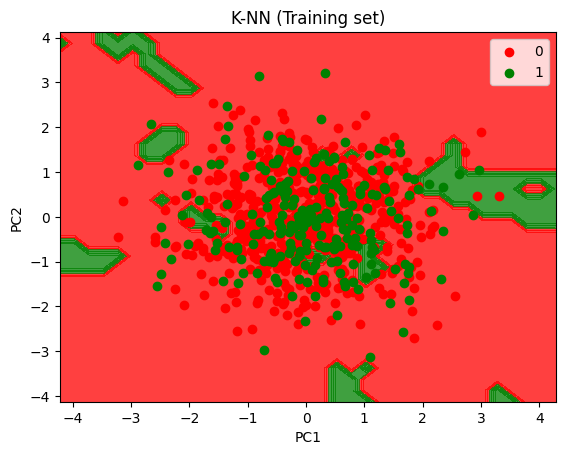

In [27]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=str(j))
plt.title('K-NN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Predicting New values

In [28]:
new_data = np.array([[74.96714153, 59.99677718,8.64964345,20.46096221, 1]])  # 5 features
new_data_scaled = sc.transform(new_data)
new_data_pca = pca.transform(new_data_scaled) 
PREDICTION = classifier.predict(new_data_pca)
input_data_str = ''.join(str(x) for x in new_data[0]) 
print(f"Input data: [{input_data_str}], Predicted value: {PREDICTION[0]}")


Input data: [74.9671415359.996777188.6496434520.460962211.0], Predicted value: 0


d:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Gaussian Naive Bayes

In [29]:
classifier = GaussianNB() 

In [30]:
classifier.fit(x_train, y_train)

GaussianNB()

In [31]:
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

In [32]:
cm = confusion_matrix(y_test, y_test_pred)
accuracyScore = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy: {accuracyScore * 100:.2f}%")
print("Confusion Matrix:\n", cm)

Model Accuracy: 67.50%
Confusion Matrix:
 [[135   0]
 [ 65   0]]


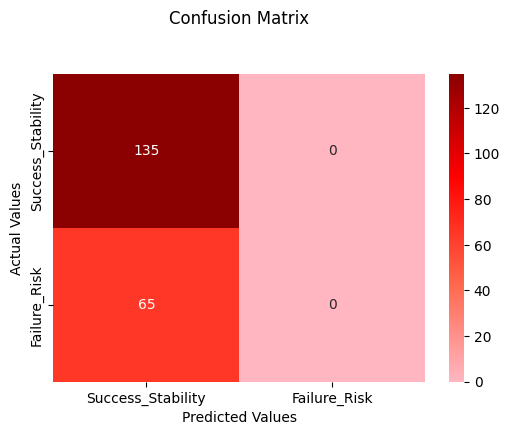

In [33]:
cmap = mcolors.LinearSegmentedColormap.from_list("red_gradient", ["#FFB6C1", "#FF6347", "#FF0000", "#8B0000"])
plt.figure(figsize=(6, 4))
ax = sb.heatmap(cm, annot=True, cmap=cmap, fmt="d", cbar=True)
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.xaxis.set_ticklabels(['Success_Stability', 'Failure_Risk'])
ax.yaxis.set_ticklabels(['Success_Stability', 'Failure_Risk'])
plt.show()

In [34]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})

print("Actual vs Predicted Table:")
display(results_df.head(10))  


Actual vs Predicted Table:


,Actual Values,Predicted Values
521,1,0
737,0,0
740,1,0
660,1,0
411,0,0
678,0,0
626,1,0
513,0,0
859,0,0
136,0,0


C:\Users\MANDO\AppData\Local\Temp\ipykernel_8792\501915433.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


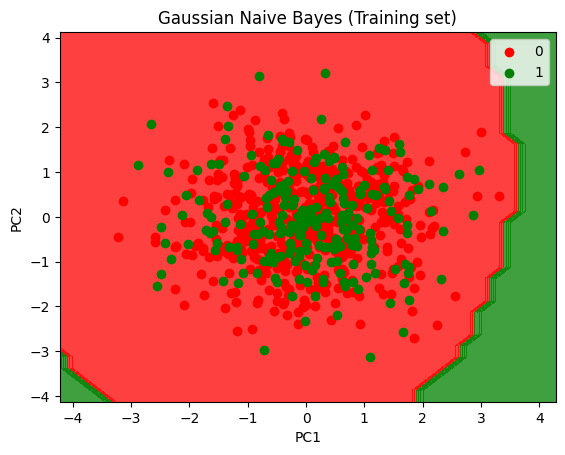

In [35]:
X_set, y_set = x_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=str(j))

plt.title('Gaussian Naive Bayes (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [36]:
new_data = np.array([[74.96714153, 56.99677718, 8.64964345, 20.46096221, 1]])  # 5 features
new_data_scaled = sc.transform(new_data)  
new_data_pca = pca.transform(new_data_scaled)  

PREDICTION = classifier.predict(new_data_pca)
input_data_str = ''.join(str(x) for x in new_data[0])  

print(f"Input data: [{input_data_str}], Predicted value: {PREDICTION[0]}")

Input data: [74.9671415356.996777188.6496434520.460962211.0], Predicted value: 0


d:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## I preferred the Gaussian Naive Bayes Algorithm over than  KNN Algorithm